# TASK -- Part 1

# ====================================

# Part 1 contains Steps 1-10 to help answer key business questions for Instacart stakeholders

# ====================================

# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r' /02 Data/Prepared data'

In [114]:
# Alternate path

path_2 = r'/Users/matthewschleigh/Desktop/CareerFoundry/Achievement 4/Instacart Basket Analysis'

In [3]:
# Import data

df = pd.read_pickle(os.path.join(path, 'final_merge.pkl'))

In [4]:
# Check output

df.shape

(32404859, 33)

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_frequency,first_name,last_name,gender,state,age,date_joined,#_of_dependents,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

# The dataframe contains two columns consisting of PII: 'first_name' and 'last_name'. When filtered, the remaining columns do not have any PII that can be traced back to a specific individual. The subset 'df_anon' will be created removing these columns for analysis.

In [6]:
df_anon = df.drop(columns = ['first_name', 'last_name'])

In [7]:
# Check output

df_anon.shape

(32404859, 31)

In [8]:
df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Spender_type,median_ord_freq,customer_frequency,gender,state,age,date_joined,#_of_dependents,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,both,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,both,...,Low_spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3A. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [9]:
# Check state names within df

df_anon['state'].value_counts(dropna=False).sort_index()

Alabama                 638003
Alaska                  648495
Arizona                 653964
Arkansas                636144
California              659783
Colorado                639280
Connecticut             623022
Delaware                637024
District of Columbia    613695
Florida                 629027
Georgia                 656389
Hawaii                  632901
Idaho                   607119
Illinois                633024
Indiana                 627282
Iowa                    625493
Kansas                  637538
Kentucky                632490
Louisiana               637482
Maine                   638583
Maryland                626579
Massachusetts           646358
Michigan                630928
Minnesota               647825
Mississippi             632675
Missouri                640732
Montana                 635265
Nebraska                625813
Nevada                  636139
New Hampshire           615378
New Jersey              627692
New Mexico              654494
New York

In [10]:
# Define regions
# Northeast, Midwest, South, and West

result = []

for value in df_anon['state']:
    
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        result.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota' ,'Iowa', 'Missouri']):
        result.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        result.append('South')
    else:
        result.append('West')
    
    

In [11]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
# Create the column for newly defined regions

df_anon['region'] = result

In [13]:
# Check output

df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,median_ord_freq,customer_frequency,gender,state,age,date_joined,#_of_dependents,marital_status,income,region
0,2539329,1,1,2,8,0.0,196,1,0,both,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,both,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


# 3B. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [14]:
# Create crosstab to compare columns

crosstab = pd.crosstab(df_anon['Spender_type'], df_anon['region'], dropna=False)

In [15]:
crosstab

region,Midwest,Northeast,South,West
Spender_type,,,,
High_spender,155975,108225,209691,160354
Low_spender,7441350,5614511,10582194,8132559


# 4. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
# Create flag 'activity_flag'
# If a user's max_order is less than 5, then flag as "Low activity"
# If a user's max_order is greater than or equal to 5, then flag as "Regular activity"

df_anon.loc[df_anon['max_order'] <5, 'activity_flag'] = 'Low activity'

In [17]:
df_anon.loc[df_anon['max_order'] >=5, 'activity_flag'] = 'Regular activity'

In [18]:
# Check output

df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_frequency,gender,state,age,date_joined,#_of_dependents,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
2,473747,1,3,3,12,21.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
4,431534,1,5,4,15,28.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity


In [19]:
df_anon.shape

(32404859, 33)

In [20]:
# Create df with only the low activity customers

df_low_activity = df_anon[df_anon['activity_flag']=='Low activity']

In [21]:
# Check output

df_low_activity.shape

(1440295, 33)

In [22]:
df_low_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_frequency,gender,state,age,date_joined,#_of_dependents,marital_status,income,region,activity_flag
1510,520620,120,1,3,11,0.0,196,2,0,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1511,3273029,120,3,2,8,19.0,196,2,1,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1512,520620,120,1,3,11,0.0,46149,1,0,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1513,3273029,120,3,2,8,19.0,46149,1,1,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity
1514,520620,120,1,3,11,0.0,26348,3,0,both,...,Regular customer,Female,Kentucky,54,3/2/2017,2,married,99219,South,Low activity


In [23]:
# Create df with only the regular activity customers

df_reg_activity = df_anon[df_anon['activity_flag']=='Regular activity']

In [24]:
# Check output

df_reg_activity.shape

(30964564, 33)

In [25]:
df_reg_activity.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,customer_frequency,gender,state,age,date_joined,#_of_dependents,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
2,473747,1,3,3,12,21.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity
4,431534,1,5,4,15,28.0,196,1,1,both,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity


In [26]:
# Export both df's

df_low_activity.to_pickle(os.path.join(path, 'activity_low_users.pkl'))

In [27]:
df_reg_activity.to_pickle(os.path.join(path, 'activity_regular_users.pkl'))

# 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [26]:
# Determine age statistics

df_anon['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [27]:
# Create variable based on age

result = []

for value in df_anon['age']:
    if (value >=18) and (value <24):
        result.append('18-24 year olds')
    elif (value >=25) and (value <34):
        result.append('25-34 year olds')
    elif (value >=35) and (value <44):
        result.append('35-44 year olds')
    elif (value >=45) and (value <54):
        result.append('45-54 year olds')
    elif (value >=55) and (value <64):
        result.append('55-64 year olds')
    else:
        result.append('65 and over')
 

In [28]:
result

['25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',
 '25-34 year olds',


In [29]:
# Assign new labels to new age_range column

df_anon['age_range'] = result

In [30]:
# Check output

df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,state,age,date_joined,#_of_dependents,marital_status,income,region,activity_flag,age_range
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds
2,473747,1,3,3,12,21.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds
4,431534,1,5,4,15,28.0,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds


In [31]:
# Determine income statistics

df_anon['income'].mean()

99437.73329450376

In [32]:
df_anon['income'].min()

25903

In [33]:
df_anon['income'].max()

593901

In [34]:
df_anon['income'].median()

96618.0

In [35]:
df_anon['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [36]:
# Create variable based on income

result = []

for value in df_anon['income']:
    if value <50000:
        result.append('0-49,999')
    elif (value >=50000) and (value <100000):
        result.append('50,000-99,999')
    elif (value >=100000) and (value <150000):
        result.append('100,000-149,999')
    elif (value >=150000) and (value <200000):
        result.append('150,000-199,999')
    else:
        result.append('200,000 and over')

In [37]:
df_anon['income_range'] = result

In [38]:
# Check output

df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,state,age,date_joined,#_of_dependents,marital_status,income,region,activity_flag,age_range,income_range
0,2539329,1,1,2,8,0.0,196,1,0,both,...,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999"
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999"
2,473747,1,3,3,12,21.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999"
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999"
4,431534,1,5,4,15,28.0,196,1,1,both,...,Alabama,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999"


In [39]:
# Cross compare high frequency of orders by product_name to their respective department_id's

df_anon['product_name'].value_counts(dropna=False)

Banana                                                    472565
Bag of Organic Bananas                                    379450
Organic Strawberries                                      264683
Organic Baby Spinach                                      241921
Organic Hass Avocado                                      213584
                                                           ...  
Deep Clean Cleanser & Mask                                     1
Glycerine Soap Cucumber                                        1
Pure Performance Restorative Shampoo Chamomile & Honey         1
Gluten Free Almond Snap Cookies                                1
Indian Wells Merlot                                            1
Name: product_name, Length: 49661, dtype: int64

In [40]:
# Create column to label departments

dept_name = []

for value in df_anon['department_id']:
    if value == 1:
        dept_name.append('Frozen')
    elif value == 2:
        dept_name.append('Other')
    elif value == 3:
        dept_name.append('Bakery')
    elif value == 4:
        dept_name.append('Produce')
    elif value == 5:
        dept_name.append('Alcohol')
    elif value == 6:
        dept_name.append('International')
    elif value == 7:
        dept_name.append('Beverages')
    elif value == 8:
        dept_name.append('Pets')
    elif value == 9:
        dept_name.append('Dry goods pasta')
    elif value == 10:
        dept_name.append('Bulk')
    elif value == 11:
        dept_name.append('Personal Care')
    elif value == 12:
        dept_name.append('Meat Seafood')
    elif value == 13:
        dept_name.append('Pantry')
    elif value == 14:
        dept_name.append('Breakfast')
    elif value == 15:
        dept_name.append('Canned goods')
    elif value == 16: 
        dept_name.append('Dairy eggs')
    elif value == 17:
        dept_name.append('Household')
    elif value == 18:
        dept_name.append('Babies')
    elif value == 19:
        dept_name.append('Snacks')
    elif value == 20:
        dept_name.append('Deli')
    else:
        dept_name.append('Missing')

In [41]:
dept_name

['Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Dairy eggs',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Household',
 'Household',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Produce',
 'Produce',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Dairy eggs',
 'Pantry',
 'Produce',
 'Produce',
 'Produce',
 'Beverages',
 'Beverages',
 'Beverages',
 'Dairy eggs',
 'Dairy eggs',
 'Snacks',
 'Dairy eggs',
 'Dairy eggs',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Beverages',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Snacks',
 'Sna

In [42]:
df_anon['department_name'] = dept_name

In [43]:
df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,age,date_joined,#_of_dependents,marital_status,income,region,activity_flag,age_range,income_range,department_name
0,2539329,1,1,2,8,0.0,196,1,0,both,...,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages
2,473747,1,3,3,12,21.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages
4,431534,1,5,4,15,28.0,196,1,1,both,...,31,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages


In [44]:
# Create column label for order_day_of_week

dow = []

for value in df_anon['order_day_of_week']:
    if value == 0:
        dow.append('Saturday')
    elif value == 1:
        dow.append('Sunday')
    elif value == 2:
        dow.append('Monday')
    elif value == 3:
        dow.append('Tuesday')
    elif value == 4:
        dow.append('Wednesday')
    elif value == 5:
        dow.append('Thursday')
    elif value == 6:
        dow.append('Friday')

In [45]:
dow

['Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Monday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Wednesday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Monday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Wednesday',
 'Monday',
 'Tuesday',
 'Monday',
 'Wednesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Monday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Wednesday',
 'Tuesday',
 'Wednesday',
 'Tuesday',
 'Sunday',
 'Wednesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Monday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Wednesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Sunday',
 'Sunday',
 'Wednesday',
 'Sunday',
 'Sunday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Sunday',
 'Monday',
 'Monday',
 'Sunday',
 'Sunday',
 'Thursday',
 'Friday',
 'Sunday',
 'Monday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Monday',
 'Thursday',
 'Sunday',
 'Thursday',
 'Friday',
 'Thursday',
 'Sunday',
 'Monday',
 'Monday',
 'Sunday',
 'Sunday',
 'Monday',
 '

In [46]:
df_anon['day_ordered'] = dow

In [47]:
df_anon.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,date_joined,#_of_dependents,marital_status,income,region,activity_flag,age_range,income_range,department_name,day_ordered
0,2539329,1,1,2,8,0.0,196,1,0,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Monday
1,2398795,1,2,3,7,15.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday
2,473747,1,3,3,12,21.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Tuesday
3,2254736,1,4,4,7,29.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday
4,431534,1,5,4,15,28.0,196,1,1,both,...,2/17/2019,3,married,40423,South,Regular activity,25-34 year olds,"0-49,999",Beverages,Wednesday


# 6. Create an appropriate visualization to show the distribution of profiles.

In [48]:
# Age versus income

cross_age_income = pd.crosstab(df_anon['income_range'], df_anon['age_range'], dropna=False)

In [49]:
cross_age_income

age_range,18-24 year olds,25-34 year olds,35-44 year olds,45-54 year olds,55-64 year olds,65 and over
income_range,,,,,,
"0-49,999",492091,728359,587347,396132,377411,1012743
"100,000-149,999",68132,104949,820415,2314836,2265467,5189386
"150,000-199,999",16504,23122,310708,824760,809952,1808092
"200,000 and over",9635,15831,25924,54951,45225,106877
"50,000-99,999",2477577,3675050,2802237,1000245,1002501,3038400


In [50]:
# Reformat rows for ease of understanding

cross_age_income.reindex(['0-49,999','50,000-99,999','100,000-149,999','150,000-199,999','200,000 and over'])

age_range,18-24 year olds,25-34 year olds,35-44 year olds,45-54 year olds,55-64 year olds,65 and over
income_range,,,,,,
"0-49,999",492091,728359,587347,396132,377411,1012743
"50,000-99,999",2477577,3675050,2802237,1000245,1002501,3038400
"100,000-149,999",68132,104949,820415,2314836,2265467,5189386
"150,000-199,999",16504,23122,310708,824760,809952,1808092
"200,000 and over",9635,15831,25924,54951,45225,106877


In [51]:
cross_age_income_reindex = cross_age_income.reindex(['0-49,999','50,000-99,999','100,000-149,999','150,000-199,999','200,000 and over'])

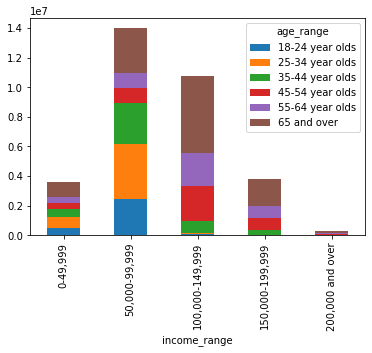

In [52]:
# Create stacked bar chart to show income distribution across ages

bar_age_income = cross_age_income_reindex.plot(kind='bar', stacked=True)

In [115]:
# EXPORT

bar_age_income.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_age_income.png'))

In [53]:
# Family status and income

cross_fam_inc = pd.crosstab(df_anon['marital_status'], df_anon['income_range'], dropna=False)[['0-49,999','50,000-99,999','100,000-149,999','150,000-199,999','200,000 and over']]


In [54]:
cross_fam_inc

income_range,"0-49,999","50,000-99,999","100,000-149,999","150,000-199,999","200,000 and over"
marital_status,,,,,
divorced/widowed,226682,617220,1393784,509384,24742
living with parents and siblings,235454,1266152,33861,10961,4175
married,2454675,9256378,8044679,2812284,188737
single,677272,2856260,1290861,460509,40789


In [55]:
# Reindex the data for ease of understanding

cross_fam_inc_reindex = cross_fam_inc.reindex(['single','married','divorced/widowed','living with parents and siblings'])

In [56]:
cross_fam_inc_reindex

income_range,"0-49,999","50,000-99,999","100,000-149,999","150,000-199,999","200,000 and over"
marital_status,,,,,
single,677272,2856260,1290861,460509,40789
married,2454675,9256378,8044679,2812284,188737
divorced/widowed,226682,617220,1393784,509384,24742
living with parents and siblings,235454,1266152,33861,10961,4175


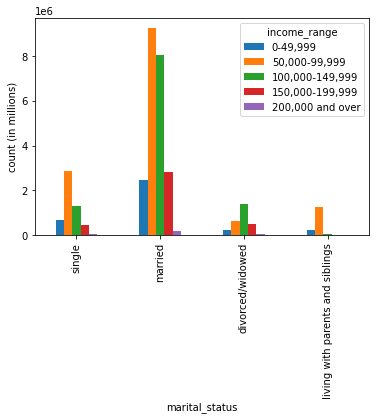

In [57]:
bar_fam_inc = cross_fam_inc_reindex.plot(kind='bar', ylabel='count (in millions)')

In [116]:
# EXPORT

bar_fam_inc.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_fam_inc.png'))

In [58]:
# Display frequency of sales by department

df_anon['department_name'].value_counts(dropna=False)

Produce            9479291
Dairy eggs         5398747
Snacks             2887550
Beverages          2688123
Frozen             2234743
Pantry             1875369
Bakery             1172428
Canned goods       1068058
Deli               1051249
Dry goods pasta     866627
Household           738666
Meat Seafood        708927
Breakfast           703033
Personal Care       447572
Babies              423802
International       269253
Alcohol             153696
Pets                 97716
Missing              69145
Other                36291
Bulk                 34573
Name: department_name, dtype: int64

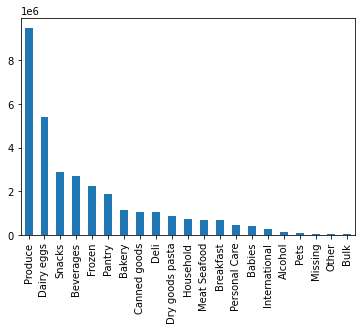

In [61]:
bar_dept = df_anon['department_name'].value_counts(dropna=False).plot.bar()

In [117]:
# EXPORT

bar_dept.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_dept.png'))

In [62]:
# Cross # of dependents against marital_status

cross_deps = pd.crosstab(df_anon['marital_status'], df_anon['#_of_dependents'], dropna=False)

In [63]:
cross_deps

#_of_dependents,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


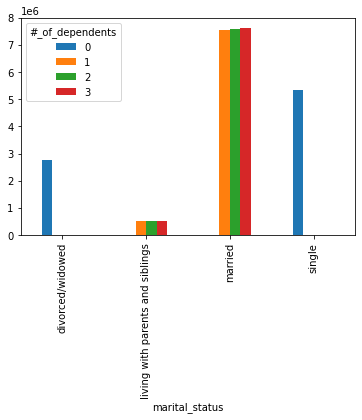

In [64]:
bar_deps = cross_deps.plot.bar()

In [118]:
# EXPORT

bar_deps.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_deps.png'))

In [65]:
cross_deps_inc = pd.crosstab(df_anon['income_range'], df_anon['#_of_dependents'], dropna=False)

In [66]:
cross_deps_inc

#_of_dependents,0,1,2,3
income_range,,,,
"0-49,999",903954,883984,908394,897751
"100,000-149,999",2684645,2673907,2676173,2728460
"150,000-199,999",969893,945861,936419,940965
"200,000 and over",65531,60132,70790,61990
"50,000-99,999",3473480,3517220,3499367,3505943


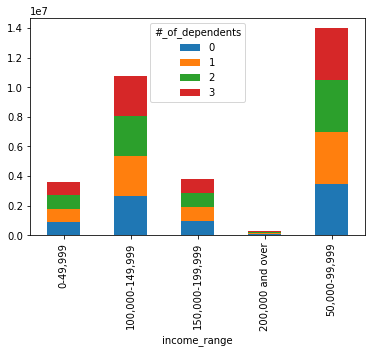

In [67]:
bar_deps_inc = cross_deps_inc.plot(kind='bar', stacked=True)

In [119]:
# EXPORT

bar_deps_inc.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_deps_inc.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [71]:
df_anon.groupby('income_range').agg({'order_number': ['mean','min','max']})

order_number        
                         mean min max
income_range                         
0-49,999            15.896069   1  99
100,000-149,999     17.205836   1  99
150,000-199,999     17.313656   1  99
200,000 and over    19.731152   1  99
50,000-99,999       17.319229   1  99

In [74]:
df_anon.groupby('income_range').agg({'mean_spending': ['mean','min','max']})

mean_spending                       
                          mean      min           max
income_range                                         
0-49,999              6.696985   1.0000     13.878571
100,000-149,999      10.439783   7.0000  14042.512281
150,000-199,999      17.094961   7.0000  15006.940000
200,000 and over    264.709601  24.1033  25005.425000
50,000-99,999         8.468613   1.1000   7700.025641

In [75]:
df_anon.groupby('marital_status').agg({'order_number': ['mean','min','max']})

order_number        
                                         mean min max
marital_status                                       
divorced/widowed                    17.275873   1  99
living with parents and siblings    17.296372   1  99
married                             17.088283   1  99
single                              17.258766   1  99

In [76]:
df_anon.groupby('marital_status').agg({'mean_spending': ['mean','min','max']})

mean_spending                   
                                          mean  min           max
marital_status                                                   
divorced/widowed                     11.453674  1.2  14042.512281
living with parents and siblings     10.828768  1.3  10209.987755
married                              12.005659  1.0  12506.925000
single                               12.480849  1.0  25005.425000

In [77]:
df_anon.groupby('age').agg({'order_number': ['mean','min','max']})

order_number        
            mean min max
age                     
18     17.041938   1  99
19     17.282324   1  99
20     16.658939   1  99
21     17.762715   1  99
22     17.960098   1  99
..           ...  ..  ..
77     16.978613   1  99
78     16.637200   1  99
79     17.220439   1  99
80     17.398377   1  99
81     17.292803   1  99

[64 rows x 3 columns]

In [78]:
df_anon.groupby('age').agg({'mean_spending': ['mean','min','max']})

mean_spending                        
             mean       min           max
age                                      
18      11.029175  2.000000   1717.904274
19       9.680995  1.300000   1574.594737
20      11.035175  1.300000   5668.766038
21      16.117472  1.100000  10209.987755
22      10.757148  1.300000    901.088393
..            ...       ...           ...
77      12.885919  1.933333   2823.981690
78      12.531951  2.733333   3902.835065
79      11.941342  1.300000  14042.512281
80      10.803855  2.145763   1619.122581
81      10.137890  2.000000   3577.762500

[64 rows x 3 columns]

In [79]:
df_anon.groupby('#_of_dependents').agg({'order_number': ['mean','min','max']})

order_number        
                        mean min max
#_of_dependents                     
0                  17.264622   1  99
1                  17.097906   1  99
2                  17.063173   1  99
3                  17.143361   1  99

In [80]:
df_anon.groupby('#_of_dependents').agg({'mean_spending': ['mean','min','max']})

mean_spending                   
                         mean  min           max
#_of_dependents                                 
0                   12.129243  1.0  25005.425000
1                   11.629316  1.1  12506.925000
2                   12.369543  1.0  11772.100000
3                   11.793264  1.0  10209.987755

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? 

In [85]:
# Examine marital status across regions

cross_region_mar = pd.crosstab(df_anon['region'], df_anon['marital_status'], dropna=False)

In [86]:
cross_region_mar

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,646401,366517,5325608,1258799
Northeast,501059,268114,4036321,917242
South,920849,529584,7560642,1780810
West,703503,386388,5834182,1368840


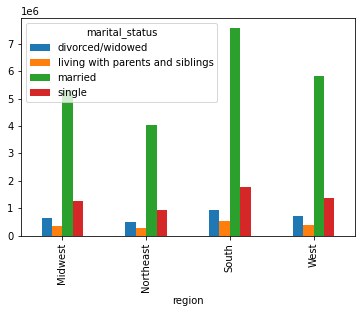

In [87]:
bar_region_mar = cross_region_mar.plot(kind='bar')

In [120]:
# EXPORT

bar_region_mar.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_region_mar.png'))

In [91]:
# Examine income level across regions

cross_region_inc = pd.crosstab(df_anon['region'], df_anon['income_range'], dropna=False)[['0-49,999','50,000-99,999','100,000-149,999','150,000-199,999','200,000 and over']]

In [92]:
cross_region_inc

income_range,"0-49,999","50,000-99,999","100,000-149,999","150,000-199,999","200,000 and over"
region,,,,,
Midwest,838398,3218985,2583994,890651,65297
Northeast,627256,2467005,1921687,665661,41127
South,1219460,4706582,3523631,1257366,84846
West,908969,3603438,2733873,979460,67173


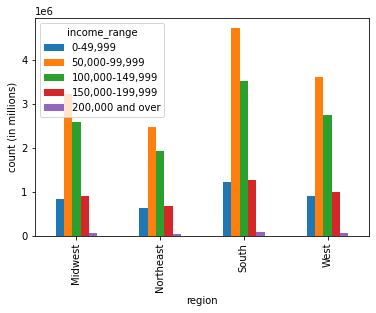

In [93]:
# Visualize

bar_region_inc = cross_region_inc.plot(kind='bar', ylabel='count (in millions)')

In [121]:
# EXPORT

bar_region_inc.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_region_inc.png'))

In [94]:
# Examine age across regions

cross_region_age = pd.crosstab(df_anon['region'], df_anon['age_range'], dropna=False)

In [95]:
cross_region_age

age_range,18-24 year olds,25-34 year olds,35-44 year olds,45-54 year olds,55-64 year olds,65 and over
region,,,,,,
Midwest,718340,1061407,1083010,1088506,1047165,2598897
Northeast,545870,800780,760764,820203,778300,2016819
South,1040416,1519556,1552334,1496605,1513839,3669135
West,759313,1165568,1150523,1185610,1161252,2870647


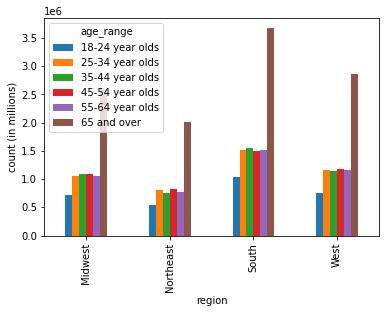

In [96]:
bar_region_age = cross_region_age.plot(kind='bar', ylabel='count (in millions)')

In [122]:
# EXPORT

bar_region_age.figure.savefig(os.path.join(path_2, '04 Analysis', 'Visualizations', '4.10_bar_region_age.png'))

In [97]:
# Examine age and departments

cross_deps_age = pd.crosstab(df_anon['department_name'], df_anon['age_range'], dropna=False)

In [98]:
cross_deps_age

age_range,18-24 year olds,25-34 year olds,35-44 year olds,45-54 year olds,55-64 year olds,65 and over
department_name,,,,,,
Alcohol,16320,21992,20942,23232,21820,49390
Babies,39819,57540,62546,62670,57587,143640
Bakery,110149,165179,163636,165585,162527,405352
Beverages,249915,374361,371696,385833,377310,929008
Breakfast,67975,99179,97362,100251,97948,240318
Bulk,3350,4866,4794,4943,4738,11882
Canned goods,100303,151447,149952,150272,147870,368214
Dairy eggs,512388,764470,759112,762205,744131,1856441
Deli,99035,147807,148722,147750,147035,360900


In [100]:
# Examine marital status and deparments

cross_deps_mar = pd.crosstab(df_anon['department_name'], df_anon['marital_status'], dropna=False)

In [101]:
cross_deps_mar

marital_status,divorced/widowed,living with parents and siblings,married,single
department_name,,,,
Alcohol,12615,8896,105682,26503
Babies,35326,20146,297162,71168
Bakery,100401,56142,821881,194004
Beverages,231025,124629,1889052,443417
Breakfast,59498,34731,493725,115079
Bulk,2765,1674,24621,5513
Canned goods,89259,51190,752030,175579
Dairy eggs,461911,260787,3788598,887451
Deli,90818,50415,735689,174327


In [104]:
# Examine income and departments

cross_deps_income = pd.crosstab(df_anon['department_name'], df_anon['income_range'], dropna=False)[['0-49,999','50,000-99,999','100,000-149,999','150,000-199,999','200,000 and over']]

In [105]:
cross_deps_income

income_range,"0-49,999","50,000-99,999","100,000-149,999","150,000-199,999","200,000 and over"
department_name,,,,,
Alcohol,19808,61158,47777,18753,6200
Babies,30858,190605,147906,52283,2150
Bakery,114709,508193,395472,141259,12795
Beverages,405505,1109160,848311,300189,24958
Breakfast,97368,295032,223776,80236,6621
Bulk,4889,14993,10918,3746,27
Canned goods,86652,471816,370832,129466,9292
Dairy eggs,535079,2361601,1817726,639319,45022
Deli,114096,455037,351114,123581,7421


In [108]:
# Examine regions and departments

cross_dept_region = pd.crosstab(df_anon['department_name'], df_anon['region'], dropna=False)

In [109]:
cross_dept_region

region,Midwest,Northeast,South,West
department_name,,,,
Alcohol,36186,26542,51624,39344
Babies,98983,75139,143654,106026
Bakery,273869,208599,388815,301145
Beverages,625574,483418,898940,680191
Breakfast,163551,123574,234251,181657
Bulk,8193,5802,11533,9045
Canned goods,250702,186755,356015,274586
Dairy eggs,1264223,954026,1796969,1383529
Deli,245678,186817,349419,269335


# 9. Produce suitable charts to illustrate your results and export them in your project folder.

In [123]:
# Export codes occur below each chart within script

# 10. Tidy up your script, export your final data set, and save your notebook.

In [124]:
df_anon.to_pickle(os.path.join(path, 'instacart_dataframe.pkl'))